In [1]:
import random
import time
import numpy as np
import matplotlib.pyplot as plt

from BST import HashTable as HashTableBST
from AVL import HashTable as HashTableAVL

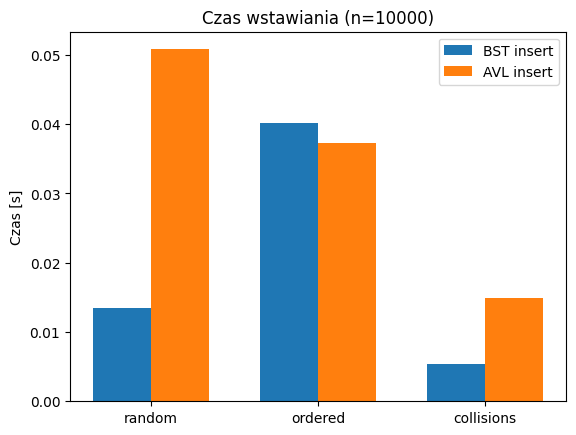

In [ ]:
# Funkcja do generowania kluczy
def generate_keys(n, scenario):
    if scenario == 'random':
        return [random.randint(0, n*10) for _ in range(n)]
    if scenario == 'ordered':
        base = list(range(n))
        noise = [random.randint(-5,5) for _ in range(n)]
        return [max(0, base[i] + noise[i]) for i in range(n)]
    if scenario == 'collisions':
        return [random.randint(0, n//10) for _ in range(n)]

# Parametry
n = 10000
scenarios = ['random', 'ordered', 'collisions']
results = { 'BST': {}, 'AVL': {} }

for scenario in scenarios:
    keys = generate_keys(n, scenario)
    results['BST'][scenario] = benchmark(HashTableBST, keys)
    results['AVL'][scenario] = benchmark(HashTableAVL, keys)

# Wizualizacja wyników
labels = scenarios
bst_insert = [results['BST'][s][0] for s in scenarios]
avl_insert = [results['AVL'][s][0] for s in scenarios]
bst_search = [results['BST'][s][1] for s in scenarios]
avl_search = [results['AVL'][s][1] for s in scenarios]

x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, bst_insert, width, label='BST insert')
rects2 = ax.bar(x + width/2, avl_insert, width, label='AVL insert')
ax.set_ylabel('Czas [s]')
ax.set_title('Czas wstawiania (n=10000)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

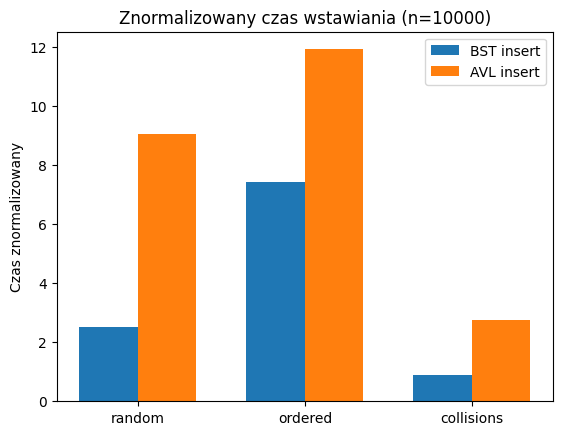

In [2]:
import random
import time
import numpy as np
import matplotlib.pyplot as plt

# Funkcja testu wzorcowego do standaryzacji
def calibration_benchmark():
    start = time.perf_counter()
    for i in range(100_000):
        _ = i ** 2
    return time.perf_counter() - start

# Generowanie danych testowych
def generate_keys(n, scenario):
    if scenario == 'random':
        return [random.randint(0, n*10) for _ in range(n)]
    if scenario == 'ordered':
        base = list(range(n))
        noise = [random.randint(-5,5) for _ in range(n)]
        return [max(0, base[i] + noise[i]) for i in range(n)]
    if scenario == 'collisions':
        return [random.randint(0, n//10) for _ in range(n)]

# Benchmark z normalizacją
def benchmark(table_cls, keys, calibration):
    ht = table_cls(size=100)
    start = time.perf_counter()
    for k in keys:
        ht.insert(k, k)
    t_insert = (time.perf_counter() - start) / calibration

    start = time.perf_counter()
    for k in keys:
        _ = ht.search(k)
    t_search = (time.perf_counter() - start) / calibration

    return t_insert, t_search

# Parametry
n = 10000
scenarios = ['random', 'ordered', 'collisions']
results = { 'BST': {}, 'AVL': {} }
calibration = calibration_benchmark()

for scenario in scenarios:
    keys = generate_keys(n, scenario)
    results['BST'][scenario] = benchmark(HashTableBST, keys, calibration)
    results['AVL'][scenario] = benchmark(HashTableAVL, keys, calibration)

# Wizualizacja wyników
labels = scenarios
bst_insert = [results['BST'][s][0] for s in scenarios]
avl_insert = [results['AVL'][s][0] for s in scenarios]
bst_search = [results['BST'][s][1] for s in scenarios]
avl_search = [results['AVL'][s][1] for s in scenarios]

x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, bst_insert, width, label='BST insert')
rects2 = ax.bar(x + width/2, avl_insert, width, label='AVL insert')
ax.set_ylabel('Czas znormalizowany')
ax.set_title('Znormalizowany czas wstawiania (n=10000)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

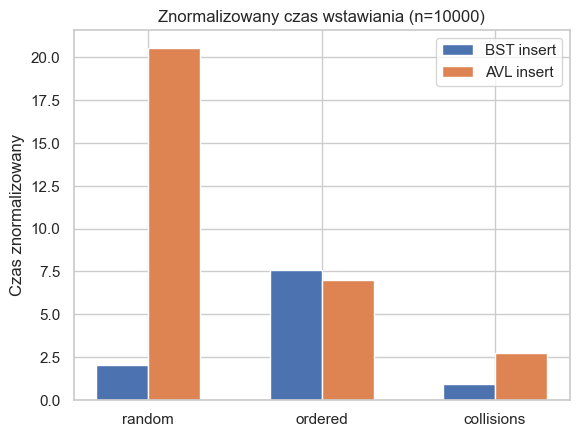

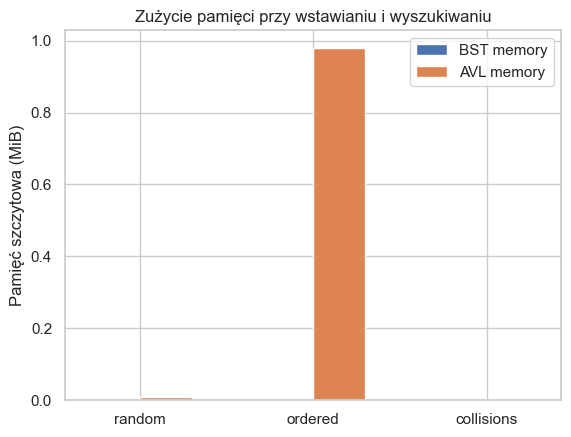

{'AVL': {'collisions': {'mem_peak': 0.0,
                        'mem_usage': [197.0859375, 197.0859375, 197.0859375],
                        'time_insert': 2.7231746835659636,
                        'time_search': 1.01097090715792},
         'ordered': {'mem_peak': 0.98046875,
                     'mem_usage': [198.06640625,
                                   197.0859375,
                                   197.0859375,
                                   197.0859375],
                     'time_insert': 6.982529825871437,
                     'time_search': 1.1914115538370986},
         'random': {'mem_peak': 0.0078125,
                    'mem_usage': [201.65234375,
                                  201.66015625,
                                  201.66015625,
                                  201.66015625],
                    'time_insert': 20.560312833286286,
                    'time_search': 1.7602512807950659}},
 'BST': {'collisions': {'mem_peak': 0.0,
                        

In [23]:
from memory_profiler import memory_usage
from pprint import pprint

# Benchmark z normalizacją i pomiarem pamięci
def my_benchmark(table_cls, keys, calibration):
    def run():
        ht = table_cls(size=10000)
        for k in keys:
            ht.insert(k, k)
        for k in keys:
            _ = ht.search(k)

    mem_usage = memory_usage(run, max_iterations=1, interval=0.001)
    mem_peak = max(mem_usage) - min(mem_usage)

    ht = table_cls(size=100)
    start = time.perf_counter()
    for k in keys:
        ht.insert(k, k)
    t_insert = (time.perf_counter() - start) / calibration

    start = time.perf_counter()
    for k in keys:
        _ = ht.search(k)
    t_search = (time.perf_counter() - start) / calibration

    results = {
        'time_insert': t_insert,
        'time_search': t_search,
        'mem_peak': mem_peak,
        'mem_usage': mem_usage,
    }

    return results

# Parametry
test_size = 10000
scenarios = ['random', 'ordered', 'collisions']
results = { 'BST': {}, 'AVL': {} }
calibration = calibration_benchmark()

my_results = {'BST': {}, 'AVL': {} }

for scenario in scenarios:
    keys = generate_keys(test_size, scenario)
    results['BST'][scenario] = my_benchmark(HashTableBST, keys, calibration)
    results['AVL'][scenario] = my_benchmark(HashTableAVL, keys, calibration)

# Wizualizacja wyników
labels = scenarios
x = np.arange(len(labels))
width = 0.3

# Wykres czasu wstawiania
fig, ax = plt.subplots()
bst_insert = [results['BST'][s]['time_insert'] for s in scenarios]
avl_insert = [results['AVL'][s]['time_insert'] for s in scenarios]
ax.bar(x - width/2, bst_insert, width, label='BST insert')
ax.bar(x + width/2, avl_insert, width, label='AVL insert')
ax.set_ylabel('Czas znormalizowany')
ax.set_title('Znormalizowany czas wstawiania (n=10000)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

# Wykres użycia pamięci
fig, ax = plt.subplots()
bst_mem = [results['BST'][s]['mem_peak'] for s in scenarios]
avl_mem = [results['AVL'][s]['mem_peak'] for s in scenarios]
ax.bar(x - width/2, bst_mem, width, label='BST memory')
ax.bar(x + width/2, avl_mem, width, label='AVL memory')
ax.set_ylabel('Pamięć szczytowa (MiB)')
ax.set_title('Zużycie pamięci przy wstawianiu i wyszukiwaniu')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

pprint(results)

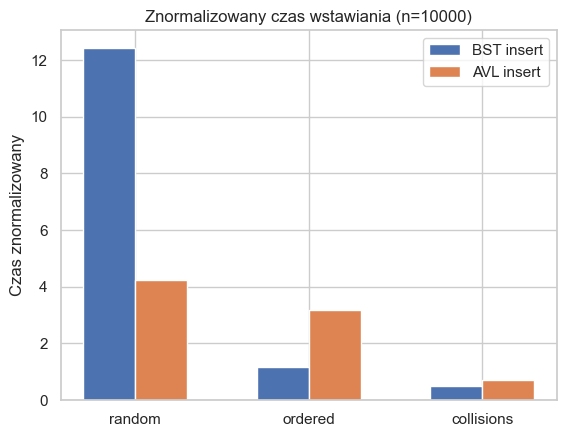

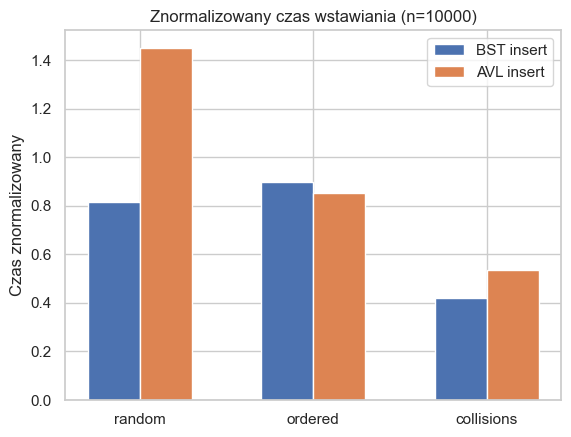

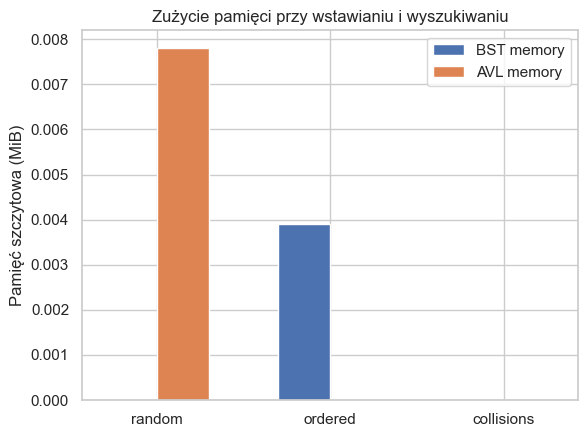

In [24]:
import random
import time
import numpy as np
import matplotlib.pyplot as plt
from memory_profiler import memory_usage

# Funkcja testu wzorcowego do standaryzacji
def calibration_benchmark():
    start = time.perf_counter()
    for i in range(100_000):
        _ = i ** 2
    return time.perf_counter() - start

# Generowanie danych testowych
def generate_keys(n, scenario):
    if scenario == 'random':
        return [random.randint(0, n*10) for _ in range(n)]
    if scenario == 'ordered':
        base = list(range(n))
        noise = [random.randint(-5,5) for _ in range(n)]
        return [max(0, base[i] + noise[i]) for i in range(n)]
    if scenario == 'collisions':
        return [random.randint(0, n//10) for _ in range(n)]

# Pomiar wydajności (czas działania)
def benchmark_performance(table_cls, keys, calibration):
    ht = table_cls(size=1000)
    start = time.perf_counter()
    for k in keys:
        ht.insert(k, k)
    t_insert = (time.perf_counter() - start) / calibration

    start = time.perf_counter()
    for k in keys:
        _ = ht.search(k)
    t_search = (time.perf_counter() - start) / calibration

    return t_insert, t_search

# Pomiar pamięci (szczytowe zużycie)
def benchmark_memory(table_cls, keys):
    def run():
        ht = table_cls(size=100)
        for k in keys:
            ht.insert(k, k)
        for k in keys:
            _ = ht.search(k)

    mem_usage = memory_usage(run, max_iterations=1, interval=0.01)
    return max(mem_usage) - min(mem_usage)

# Parametry
test_size = 10000
scenarios = ['random', 'ordered', 'collisions']
results = { 'BST': {}, 'AVL': {} }
calibration = calibration_benchmark()

for scenario in scenarios:
    keys = generate_keys(test_size, scenario)
    t_insert_bst, t_search_bst = benchmark_performance(HashTableBST, keys, calibration)
    t_insert_avl, t_search_avl = benchmark_performance(HashTableAVL, keys, calibration)

    mem_bst = benchmark_memory(HashTableBST, keys)
    mem_avl = benchmark_memory(HashTableAVL, keys)

    results['BST'][scenario] = (t_insert_bst, t_search_bst, mem_bst)
    results['AVL'][scenario] = (t_insert_avl, t_search_avl, mem_avl)

# Wizualizacja wyników
labels = scenarios
x = np.arange(len(labels))
width = 0.3

# Wykres czasu wstawiania
fig, ax = plt.subplots()
bst_insert = [results['BST'][s][0] for s in scenarios]
avl_insert = [results['AVL'][s][0] for s in scenarios]
ax.bar(x - width/2, bst_insert, width, label='BST insert')
ax.bar(x + width/2, avl_insert, width, label='AVL insert')
ax.set_ylabel('Czas znormalizowany')
ax.set_title('Znormalizowany czas wstawiania (n=10000)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

# Wykres czasu wyszukiwania
fig, ax = plt.subplots()
bst_insert = [results['BST'][s][1] for s in scenarios]
avl_insert = [results['AVL'][s][1] for s in scenarios]
ax.bar(x - width/2, bst_insert, width, label='BST insert')
ax.bar(x + width/2, avl_insert, width, label='AVL insert')
ax.set_ylabel('Czas znormalizowany')
ax.set_title('Znormalizowany czas wstawiania (n=10000)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

# Wykres użycia pamięci
fig, ax = plt.subplots()
bst_mem = [results['BST'][s][2] for s in scenarios]
avl_mem = [results['AVL'][s][2] for s in scenarios]
ax.bar(x - width/2, bst_mem, width, label='BST memory')
ax.bar(x + width/2, avl_mem, width, label='AVL memory')
ax.set_ylabel('Pamięć szczytowa (MiB)')
ax.set_title('Zużycie pamięci przy wstawianiu i wyszukiwaniu')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

      Scenario Structure  Insert Time   Search Time  Memory (MiB)
0       random       BST    65.960510     43.712996      4.000000
1       random       AVL   175.261395     42.126791      4.777344
2       random      List     1.800807  35044.491601           NaN
3       random      Dict     2.438973      1.305956           NaN
4      ordered       BST  1755.685195   1589.395117      3.066406
5      ordered       AVL   127.255110     18.476623      0.000000
6      ordered      List     1.552177  29730.185645           NaN
7      ordered      Dict     1.223608      0.735786           NaN
8   collisions       BST    21.897623     20.252721      1.285156
9   collisions       AVL    89.644960     20.172175      0.011719
10  collisions      List     1.467362   6022.780151           NaN
11  collisions      Dict     1.503191      1.295188           NaN


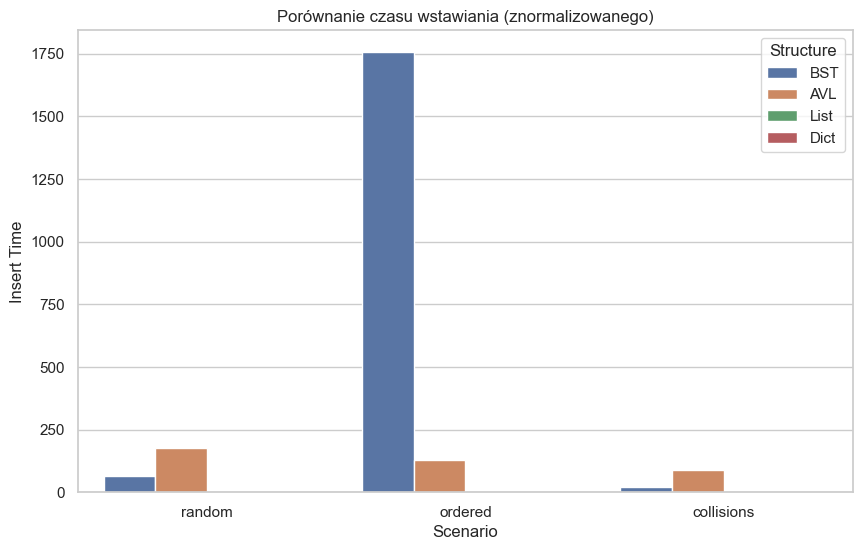

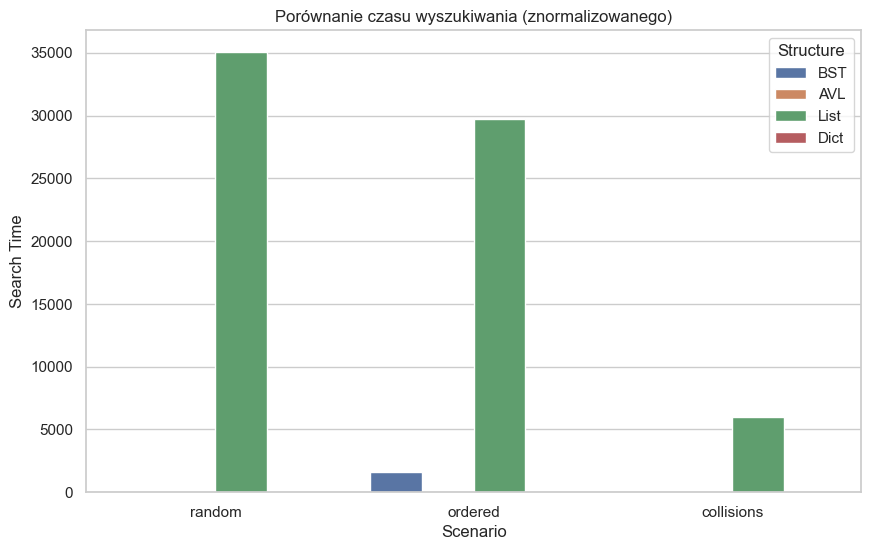

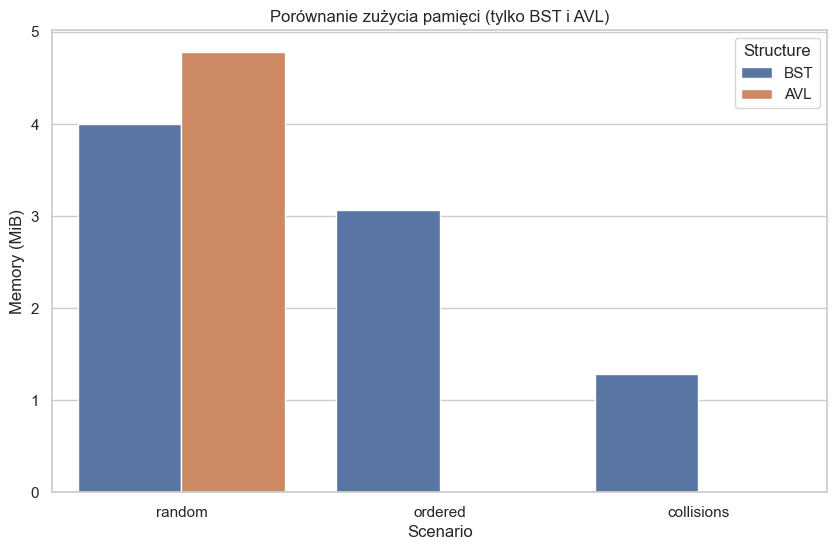

,Scenario,Structure,Insert Time,Search Time,Memory (MiB)
0,random,BST,65.960510,43.712996,4.000000
1,random,AVL,175.261395,42.126791,4.777344
2,random,List,1.800807,35044.491601,NaN
3,random,Dict,2.438973,1.305956,NaN
4,ordered,BST,1755.685195,1589.395117,3.066406
5,ordered,AVL,127.255110,18.476623,0.000000
6,ordered,List,1.552177,29730.185645,NaN
7,ordered,Dict,1.223608,0.735786,NaN
8,collisions,BST,21.897623,20.252721,1.285156
9,collisions,AVL,89.644960,20.172175,0.011719


In [26]:
import random
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from memory_profiler import memory_usage

# Test kalibracyjny
def calibration_benchmark():
    start = time.perf_counter()
    for i in range(100_000):
        _ = i ** 2
    return time.perf_counter() - start

# Generowanie danych
def generate_keys(n, scenario):
    if scenario == 'random':
        return [random.randint(0, n*10) for _ in range(n)]
    elif scenario == 'ordered':
        base = list(range(n))
        noise = [random.randint(-5,5) for _ in range(n)]
        return [max(0, base[i] + noise[i]) for i in range(n)]
    elif scenario == 'collisions':
        return [random.randint(0, n//10) for _ in range(n)]

# Pomiar czasu
def benchmark_performance(table_cls, keys, calibration):
    ht = table_cls(size=100)
    start = time.perf_counter()
    for k in keys:
        ht.insert(k, k)
    t_insert = (time.perf_counter() - start) / calibration

    start = time.perf_counter()
    for k in keys:
        _ = ht.search(k)
    t_search = (time.perf_counter() - start) / calibration

    return t_insert, t_search

# Pomiar pamięci
def benchmark_memory(table_cls, keys):
    def run():
        ht = table_cls(size=100)
        for k in keys:
            ht.insert(k, k)
        for k in keys:
            _ = ht.search(k)

    mem_usage = memory_usage(run, max_iterations=1, interval=0.01)
    return max(mem_usage) - min(mem_usage)

# Pomiar dla listy i słownika
def benchmark_builtin_structures(keys, calibration):
    data_list = []
    data_dict = {}

    start = time.perf_counter()
    for k in keys:
        data_list.append((k, k))
    t_insert_list = (time.perf_counter() - start) / calibration

    start = time.perf_counter()
    for k in keys:
        _ = next((v for key, v in data_list if key == k), None)
    t_search_list = (time.perf_counter() - start) / calibration

    start = time.perf_counter()
    for k in keys:
        data_dict[k] = k
    t_insert_dict = (time.perf_counter() - start) / calibration

    start = time.perf_counter()
    for k in keys:
        _ = data_dict.get(k)
    t_search_dict = (time.perf_counter() - start) / calibration

    return (t_insert_list, t_search_list), (t_insert_dict, t_search_dict)

# Benchmark
test_size = 100000
scenarios = ['random', 'ordered', 'collisions']
calibration = calibration_benchmark()

results_table = []

for scenario in scenarios:
    keys = generate_keys(test_size, scenario)

    bst_ins, bst_srch = benchmark_performance(HashTableBST, keys, calibration)
    avl_ins, avl_srch = benchmark_performance(HashTableAVL, keys, calibration)
    list_perf, dict_perf = benchmark_builtin_structures(keys, calibration)

    bst_mem = benchmark_memory(HashTableBST, keys)
    avl_mem = benchmark_memory(HashTableAVL, keys)

    results_table.append([scenario, 'BST', bst_ins, bst_srch, bst_mem])
    results_table.append([scenario, 'AVL', avl_ins, avl_srch, avl_mem])
    results_table.append([scenario, 'List', list_perf[0], list_perf[1], None])
    results_table.append([scenario, 'Dict', dict_perf[0], dict_perf[1], None])

# Tabela wyników
results_df = pd.DataFrame(results_table, columns=['Scenario', 'Structure', 'Insert Time', 'Search Time', 'Memory (MiB)'])
print(results_df)

# Wykresy
import seaborn as sns
sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data=results_df, x="Scenario", y="Insert Time", hue="Structure", ax=ax)
ax.set_title("Porównanie czasu wstawiania (znormalizowanego)")
plt.show()

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data=results_df, x="Scenario", y="Search Time", hue="Structure", ax=ax)
ax.set_title("Porównanie czasu wyszukiwania (znormalizowanego)")
plt.show()

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data=results_df.dropna(), x="Scenario", y="Memory (MiB)", hue="Structure", ax=ax)
ax.set_title("Porównanie zużycia pamięci (tylko BST i AVL)")
plt.show()

results_df

In [ ]:
import random
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from Benchmark import calibration_benchmark
from Benchmark import performance_benchmark
from Benchmark import memory_benchmark
from Generators import generate_keys

# Benchmark
test_size = 10000
table_cls = 100
scenarios = ['random', 'ordered', 'collisions']
calibration = calibration_benchmark()

results_table = []

for scenario in scenarios:
    keys = generate_keys(test_size, scenario)

    bst_ins, bst_srch = performance_benchmark(HashTableBST, keys, calibration)
    avl_ins, avl_srch = performance_benchmark(HashTableAVL, keys, calibration)
    list_perf, dict_perf = benchmark_builtin_structures(keys, calibration)

    bst_mem = memory_benchmark(HashTableBST, keys)
    avl_mem = memory_benchmark(HashTableAVL, keys)

    results_table.append([scenario, 'BST', bst_ins, bst_srch, bst_mem])
    results_table.append([scenario, 'AVL', avl_ins, avl_srch, avl_mem])
    results_table.append([scenario, 'List', list_perf[0], list_perf[1], None])
    results_table.append([scenario, 'Dict', dict_perf[0], dict_perf[1], None])

# Tabela wyników
results_df = pd.DataFrame(results_table, columns=['Scenario', 'Structure', 'Insert Time', 'Search Time', 'Memory (MiB)'])
print(results_df)

# Wykresy
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data=results_df, x="Scenario", y="Insert Time", hue="Structure", ax=ax)
ax.set_title("Porównanie czasu wstawiania (znormalizowanego)")
plt.show()

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data=results_df, x="Scenario", y="Search Time", hue="Structure", ax=ax)
ax.set_title("Porównanie czasu wyszukiwania (znormalizowanego)")
plt.show()

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data=results_df.dropna(), x="Scenario", y="Memory (MiB)", hue="Structure", ax=ax)
ax.set_title("Porównanie zużycia pamięci (tylko BST i AVL)")
plt.show()

results_df